In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import os

In [2]:
def border():
    bwith = 2 #边框宽度设置为2
    ax = plt.gca()#获取边框
    ax.tick_params(axis="x", direction="in", length=16, width=5, color="k")
    ax.tick_params(axis="x", direction="in", length=16, width=5, color="k")
    # ax.spines['top'].set_color('grey')  # 设置上‘脊梁’为红色
    # ax.spines['right'].set_color('grey')  # 设置右‘脊梁’为无色
    # ax.spines['left'].set_color('grey')  # 设置上‘脊梁’为红色
    # ax.spines['bottom'].set_color('none')  # 设置右‘脊梁’为无色
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
ft = 60 # font size
lw = 8 # line width
marker = ["o", "v", "s", "^", "D", "o"]
# linestyle = ["-", ":", "--", "-.",('loosely dotted', (0, (1, 10)))]
color = ['darkred','darkblue','darkgreen','darkorange','darkviolet']
linestyle = [(0, ()), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4))]

type = ["FedCLS", "Ours", "Ours+", "Ours++"]

In [3]:
root_path = "../../data/overall-performance/roberta_base_draw-yaozong"
output_fig_path = '../../figs/overall'
# roberta-large
filenames_list = {
    "agnews": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
    "mnli": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
    "yahoo": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
    "yelp-full": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
}

# per batch latency, bs = 4, msl = 256
# for bert-base/robert-base, latency = 1.86 for bs = 4, thus about 0.5 for per sample
train_latency_list = {"tx2+bitfit": 1 / 4, "tx2+full": 2 / 4}
infer_latency_list = {"tx2+bitfit": 0.5 / 4, "tx2+full": 1 / 4}
communication_latency_list = {"bitfit": 400 * 2 / 1000 / 1, "full": 400 * 2 / 1}


In [4]:
datasets = {"agnews": 1,"mnli": 0, "yahoo": 5, "yelp-full": 0} # "agnews": 1, "mnli": 0, "yahoo": 5, "yelp-full": 0
all_client_num_in_total_list = {"agnews": 100, "yahoo": 1000, "yelp-full": 1000, "mnli": 1000}
alphas = {"agnews": 1, "yahoo": 0, "yelp-full": 0, "mnli": 0}
gammas = {"agnews": 0.001, "yahoo": 100, "yelp-full": 100, "mnli": 100}
seed = 99
# plot hyper-para.
colors=['r','g','b','y','c','m','k'] * 100
full_set_acc= {"agnews": 0.93, "yahoo": 0.78, "yelp-full": 0.7, "mnli": 0.85}

348 347


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


480 479
240 16


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


93 93


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:116: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "borderpad" which is no longer supported as of 3.3 and will become an error in 3.6


413 412


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


221 221


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


273 272


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


255 255
84 83


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:116: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "borderpad" which is no longer supported as of 3.3 and will become an error in 3.6
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


56 55
58 57


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


48 47
84 83


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:116: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "borderpad" which is no longer supported as of 3.3 and will become an error in 3.6
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


68 67
72 71


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


58 57


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:116: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "borderpad" which is no longer supported as of 3.3 and will become an error in 3.6


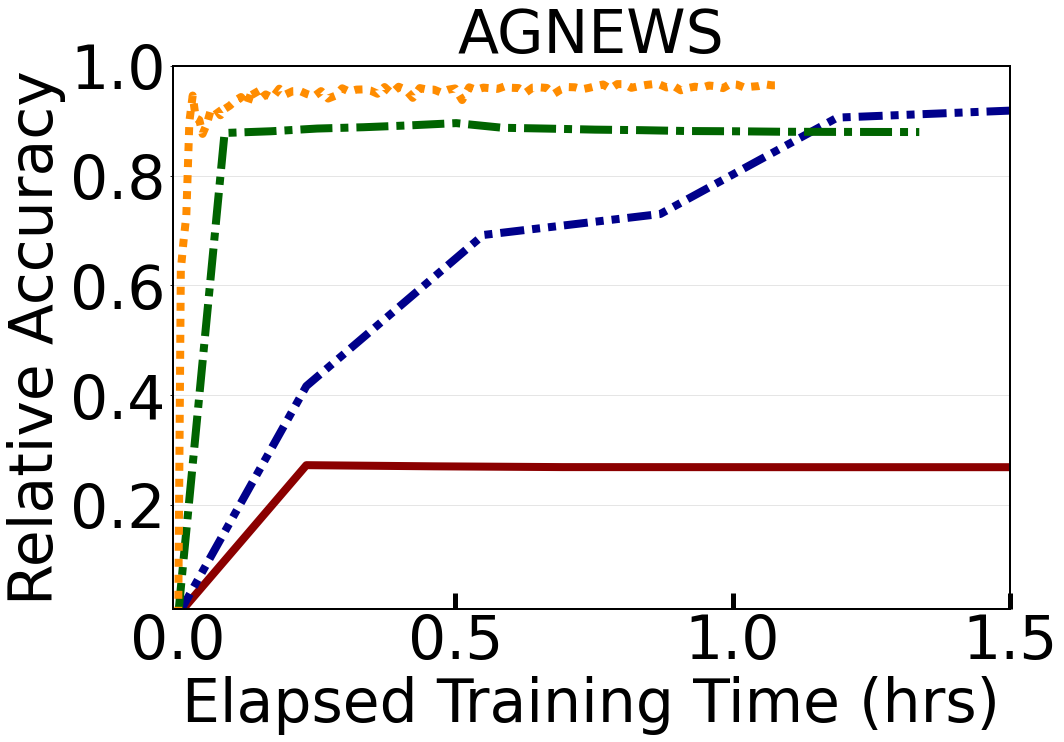

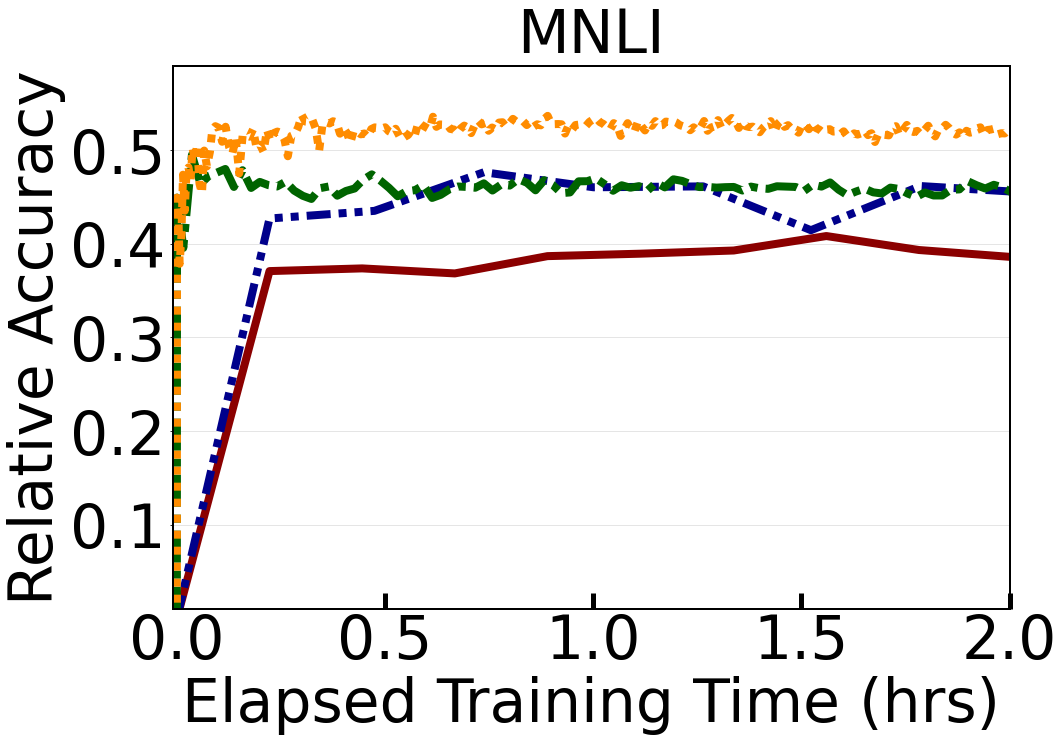

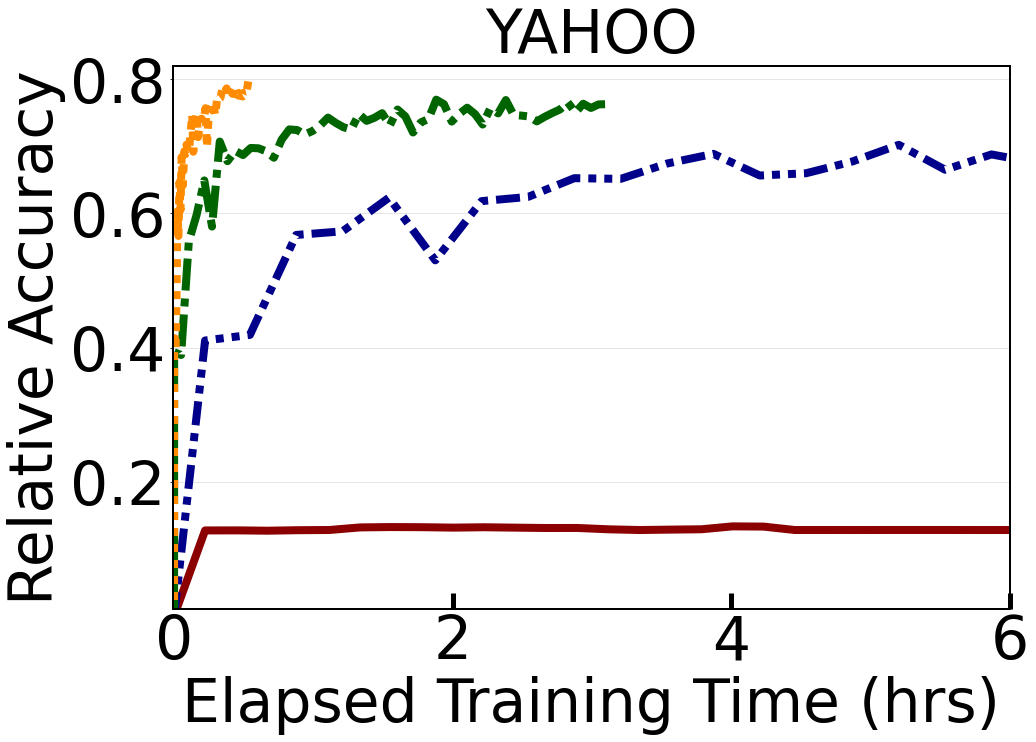

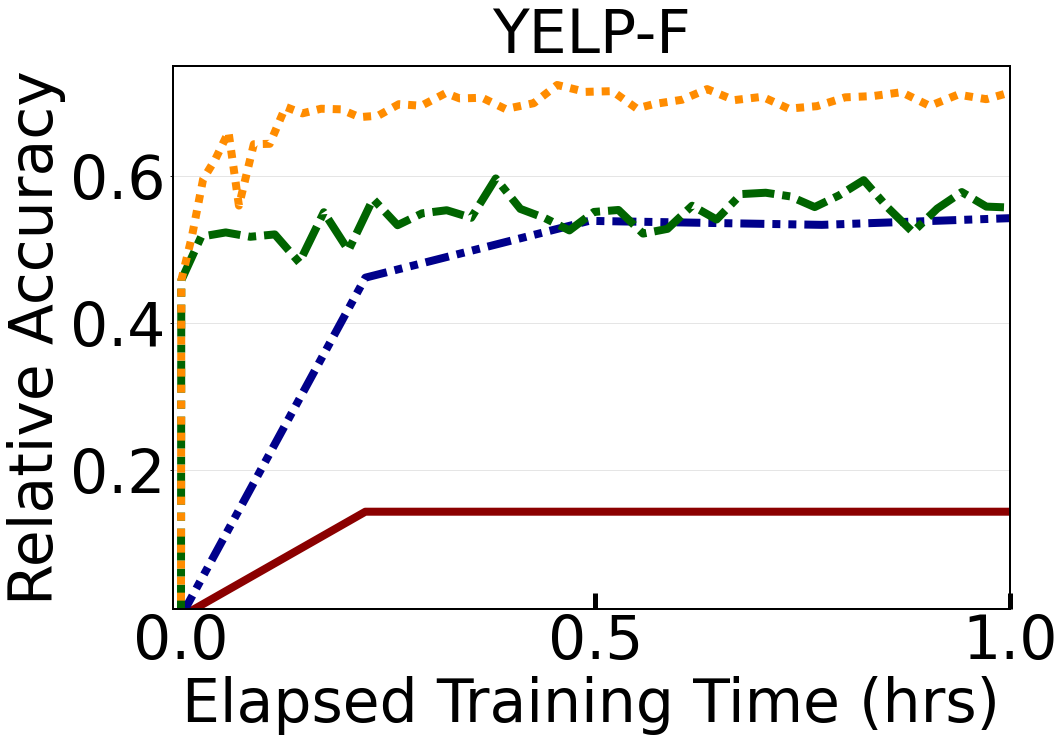

In [12]:
# time to accuracy  
t = 0   
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
runtime_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}     
xlim = {"agnews": [-0.01,1.5], "mnli": [-0.01,2], "yahoo": [-0.01,6], "yelp-full": [-0.01,1]}
ylim = {"agnews": [0.01,1], "mnli": [0.01,0.59], "yahoo": [0.01,0.82], "yelp-full": [0.01,0.75]}
axis_gap = {"agnews": [0.2,0.5], "mnli": [0.1,0.5], "yahoo": [0.2,2], "yelp-full": [0.2,0.5]}

start_point = {"agnews": [0,0], "mnli": [0,0], "yahoo": [0,0], "yelp-full": [0,0]}

dataset_title = ["AGNEWS", "MNLI", "YAHOO", "YELP-F"]
d=0
for dataset in datasets:

    log_root_path = os.path.join(root_path,f"{dataset}")
    
    fig = plt.figure(figsize=(15,10))
    plt.title(dataset_title[d],fontsize=ft)
    d = d+1
    # 设置刻度字体大小
    plt.xticks(fontsize=ft)
    plt.yticks(fontsize=ft)
    plt.xlabel("Elapsed Training Time (hrs)", fontsize=ft)
    plt.ylabel("Relative Accuracy", fontsize=ft)
    plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
    border()

    x_major_locator=MultipleLocator(axis_gap[dataset][1])
    y_major_locator=MultipleLocator(axis_gap[dataset][0])
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)

    plt.xlim(xlim[dataset][0],xlim[dataset][1])
    plt.ylim(ylim[dataset][0],ylim[dataset][1])
    
    filenames = filenames_list[dataset]

    for filename in filenames:

        log_path = os.path.join(log_root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue

        iter = 1000
        phrase = 'train data'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        runtime = []
        train_runtime = []
        infer_runtime = []
        time_stamp = 0
        train_time_stamp = 0
        infer_time_stamp = 0

        for line in f:
            if phrase in line:
                line_idx = f.index(line)
                
                train_info = f[line_idx]
                infer_info = f[line_idx + 1]
                
                train_samples = list(map(int, re.findall(r'\d+', train_info.split("Gen")[1])))[1:]
                infer_samples = list(map(int, re.findall(r'\d+', infer_info.split("Gen")[1])))[1:]

                if filenames.index(filename) <= 1:
                    # TX2: train, 1s/sample, infer, 0.5s/sample
                    train_time = np.max(train_samples) * train_latency_list["tx2+full"] if len(train_samples) > 0 else 0
                    infer_time = np.max(infer_samples) * infer_latency_list["tx2+full"] if len(infer_samples) > 0 else 0
                else:
                    # TX2: train, 1s/sample, infer, 0.5s/sample
                    train_time = np.max(train_samples) * train_latency_list["tx2+bitfit"] if len(train_samples) > 0 else 0
                    infer_time = np.max(infer_samples) * infer_latency_list["tx2+bitfit"] if len(infer_samples) > 0 else 0
                
                if filenames.index(filename) <= 1:
                    comm_time = communication_latency_list["full"]
                else:
                    comm_time = communication_latency_list["bitfit"]

                time_stamp = time_stamp + train_time + infer_time + comm_time # elasped time of all clients / energy consumption
                train_time_stamp = train_time + train_time_stamp
                infer_time_stamp = infer_time + infer_time_stamp

                runtime.append(time_stamp)
                train_runtime.append(train_time_stamp)
                infer_runtime.append(infer_time_stamp)
            if 'aggregated model performance is' in line: 
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")

        this_max_acc = np.max(df[0])
        acc_list[dataset].append(this_max_acc)

        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(len(runtime),len(list(map(float, y_mean))))
        
        file_idx = filenames.index(filename)
        plot_x = np.array([start_point[dataset][0]] + runtime[:len(y_mean)]) / 3600
        plot_y = np.array([start_point[dataset][1]] + y_mean)/full_set_acc[dataset]
        plt.plot(plot_x, plot_y, label = type[file_idx], linewidth = lw, color = color[file_idx], linestyle = linestyle[file_idx])
    # plt.legend(fontsize=50,ncol = 1,frameon=False, loc = 'lower right', bbox_to_anchor=(1.0, 0.2))
    fig.savefig(os.path.join(output_fig_path, f"final-{dataset}-roberta-base-time2accuracy.pdf"), borderpad=0.1, bbox_inches='tight')

In [6]:
acc_list

{'agnews': [0.32223684210526315,
  0.9010526315789473,
  0.8327631578947369,
  0.8989473684210526],
 'mnli': [0.3890440938511327,
  0.42587875700458483,
  0.4206826286296485,
  0.45674987264391237],
 'yahoo': [0.10418333333333334,
  0.5566333333333333,
  0.6001333333333333,
  0.6260166666666667],
 'yelp-full': [0.19775, 0.42744, 0.42624, 0.51064]}

In [7]:
acc_1 = []
acc_2 = []
for dataset in acc_list:
    print((acc_list[dataset][3] - acc_list[dataset][0])/full_set_acc[dataset])
    acc_1.append((acc_list[dataset][3] - acc_list[dataset][1])/full_set_acc[dataset])
    acc_2.append((acc_list[dataset][3] - acc_list[dataset][2])/full_set_acc[dataset])

0.6201188455008488
0.0796538574032702
0.6690170940170941
0.4469857142857143


In [8]:
for dataset in acc_list:
    print(acc_list[dataset][3]/full_set_acc[dataset])

0.9666100735710242
0.5373527913457793
0.8025854700854701
0.7294857142857143


In [9]:
np.mean(acc_1)

0.060466342515030136

In [10]:
np.mean(acc_2)

0.06683826470172703